In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
X = df.drop('class',axis=1)
X = pd.get_dummies(X,drop_first=True)

y = df['class']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [6]:
param_grid = {"n_estimators":[1,5,10,20,40,100],
              'max_depth':[3,4,5,6],
              'learning_rate':[0.1,0.05,0.2]}
gb_model = GradientBoostingClassifier()
grid = GridSearchCV(gb_model,param_grid)

In [7]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [8]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [9]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [10]:
predictions = grid.predict(X_test)

In [11]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [12]:
print(accuracy_score(y_test,predictions))

1.0


In [13]:
print(confusion_matrix(y_test,predictions))

[[655   0]
 [  0 564]]


In [14]:
feat_import = grid.best_estimator_.feature_importances_

In [15]:
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])

In [16]:
imp_feats.sort_values("Importance",ascending=False)

,Importance
odor_n,0.614744
stalk-root_c,0.135972
bruises_t,0.051367
stalk-root_r,0.044753
spore-print-color_r,0.030495
...,...
stalk-color-below-ring_o,0.000000
stalk-color-below-ring_p,0.000000
gill-color_e,0.000000
veil-color_o,0.000000


In [17]:
imp_feats = imp_feats[imp_feats['Importance'] > 0.000527]

In [18]:
imp_feats.sort_values('Importance')

,Importance
stalk-shape_t,0.000732
stalk-color-below-ring_w,0.000817
stalk-root_b,0.001047
cap-surface_g,0.001050
stalk-surface-above-ring_s,0.001436
cap-color_y,0.002311
population_c,0.002343
stalk-color-below-ring_c,0.002441
stalk-color-below-ring_y,0.003023
odor_m,0.003148


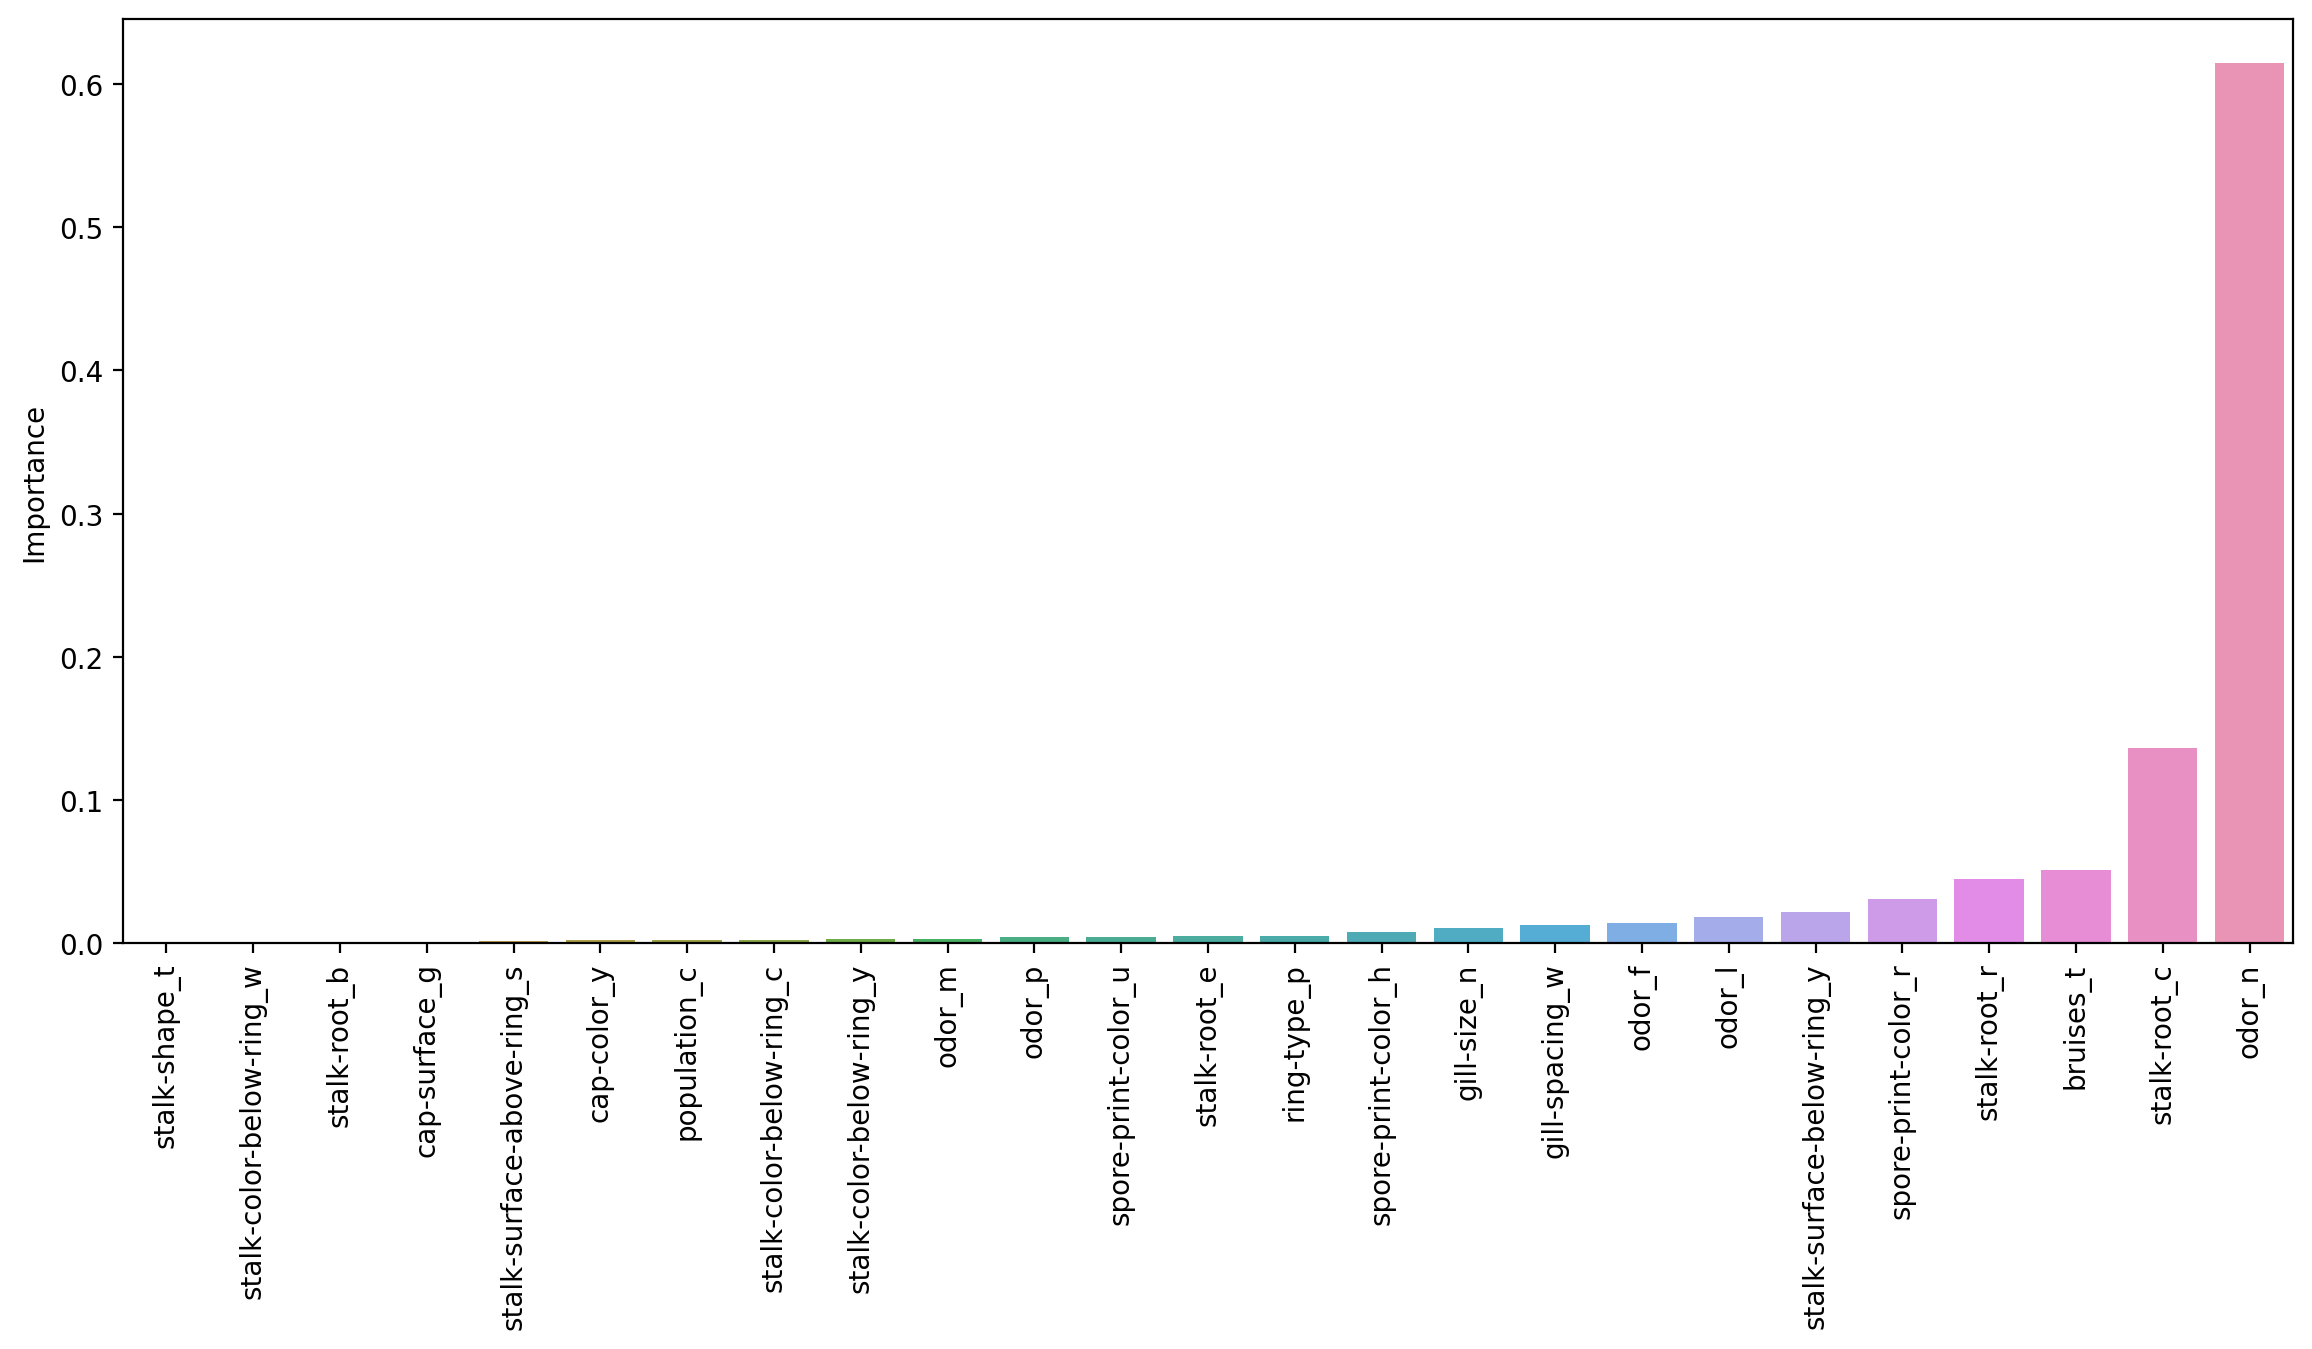

In [19]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);